In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.decomposition import PCA

### Functional analysis of transcriptomics data from SARS-CoV-2 infected cell lines

Data is from [GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)

In [12]:
data = pd.read_csv("meta.csv", sep=",", header=0, index_col=0)

In [23]:
data = pd.read_csv("GSE147507_RawReadCounts_Human.csv", sep=",", header=0, index_col=0)

In [24]:
data.head()

,GSM4432378,GSM4432379,GSM4432380,GSM4432381,GSM4432382,GSM4432383,GSM4432384,GSM4432385,GSM4432386,GSM4432387,...,GSM4462375,GSM4462376,GSM4462377,GSM4462378,GSM4462379,GSM4462380,GSM4462413,GSM4462414,GSM4462415,GSM4462416
DDX11L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH7P,29,24,23,34,19,44,68,43,33,65,...,72,66,46,35,48,46,140,261,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
np.sum(data.index != data.columns) ## itt nem ment

ValueError: Lengths must match to compare

In [25]:
data["Cell"].value_counts()

KeyError: 'Cell'

In [16]:
data["Treatment"].value_counts()

Mock          26
SARS-CoV-2    15
IFNB           6
IAV            6
RSV            5
IAVdNS1        4
HPIV3          3
Helathy        2
COVID          2
Name: Treatment, dtype: int64

### Basic exploratory analysis with PCA

In [17]:
data.head()

,ID,Series,Replicate,Cell,Treatment
!Sample_geo_accession,,,,,
GSM4432378,Series1_NHBE_Mock_1,Series1,1,NHBE,Mock
GSM4432379,Series1_NHBE_Mock_2,Series1,2,NHBE,Mock
GSM4432380,Series1_NHBE_Mock_3,Series1,3,NHBE,Mock
GSM4432381,Series1_NHBE_SARS-CoV-2_1,Series1,1,NHBE,SARS-CoV-2
GSM4432382,Series1_NHBE_SARS-CoV-2_2,Series1,2,NHBE,SARS-CoV-2


### Basics of statistical modelling

(array([25., 22., 13.,  4.,  1.,  2.,  0.,  1.,  0.,  1.]),
 array([  0. ,  26.1,  52.2,  78.3, 104.4, 130.5, 156.6, 182.7, 208.8,
        234.9, 261. ]),
 <a list of 10 Patch objects>)

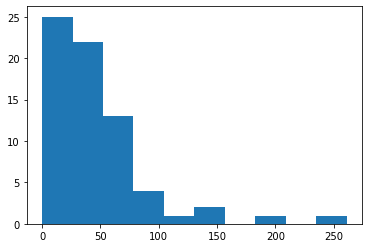

In [26]:
plt.hist(data.loc['WASH7P'])

(array([31., 12., 10.,  6.,  4.,  2.,  0.,  3.,  0.,  1.]),
 array([   48. ,  2519.9,  4991.8,  7463.7,  9935.6, 12407.5, 14879.4,
        17351.3, 19823.2, 22295.1, 24767. ]),
 <a list of 10 Patch objects>)

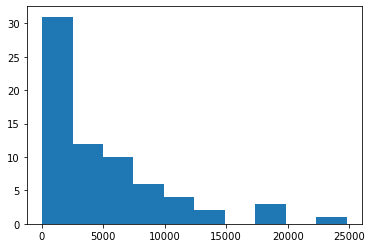

In [27]:
plt.hist(data.loc['STAT1'])

In [21]:
plt.hist(data["STAT1"])

KeyError: 'STAT1'

In [22]:
data.shape

(69, 5)

### Homework

* Calculate coefficients for Calu-3 and A549 cells, and plot the them (scatter plot) against each other. You will have to filter for these data, and run a statistical model with only 'Treatment' factor (basically it is a t-test). 
* install [DESeq2](https://bioconductor.org/packages/release/bioc/html/DESeq2.html) library in R.